In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#使用numpy生产200个线性的随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
print(x_data,x_data.shape)
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

[[-0.5       ]
 [-0.49497487]
 [-0.48994975]
 [-0.48492462]
 [-0.4798995 ]
 [-0.47487437]
 [-0.46984925]
 [-0.46482412]
 [-0.45979899]
 [-0.45477387]
 [-0.44974874]
 [-0.44472362]
 [-0.43969849]
 [-0.43467337]
 [-0.42964824]
 [-0.42462312]
 [-0.41959799]
 [-0.41457286]
 [-0.40954774]
 [-0.40452261]
 [-0.39949749]
 [-0.39447236]
 [-0.38944724]
 [-0.38442211]
 [-0.37939698]
 [-0.37437186]
 [-0.36934673]
 [-0.36432161]
 [-0.35929648]
 [-0.35427136]
 [-0.34924623]
 [-0.34422111]
 [-0.33919598]
 [-0.33417085]
 [-0.32914573]
 [-0.3241206 ]
 [-0.31909548]
 [-0.31407035]
 [-0.30904523]
 [-0.3040201 ]
 [-0.29899497]
 [-0.29396985]
 [-0.28894472]
 [-0.2839196 ]
 [-0.27889447]
 [-0.27386935]
 [-0.26884422]
 [-0.2638191 ]
 [-0.25879397]
 [-0.25376884]
 [-0.24874372]
 [-0.24371859]
 [-0.23869347]
 [-0.23366834]
 [-0.22864322]
 [-0.22361809]
 [-0.21859296]
 [-0.21356784]
 [-0.20854271]
 [-0.20351759]
 [-0.19849246]
 [-0.19346734]
 [-0.18844221]
 [-0.18341709]
 [-0.17839196]
 [-0.17336683]
 [-0.16834

In [3]:
#定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

In [4]:
#定义神经网络中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
Bias_L1 = tf.Variable(tf.random_normal([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1)+Bias_L1 #注意矩阵乘法的前后顺序
L1 = tf.nn.tanh(Wx_plus_b_L1)
'''tf.global_variables_initializer()
with tf.Session() as sess:
    print(sess.run([Weights_L1,Bias_L1]))'''

'tf.global_variables_initializer()\nwith tf.Session() as sess:\n    print(sess.run([Weights_L1,Bias_L1]))'

In [5]:
#定义神经网络输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
Bias_L2 = tf.Variable(tf.random_normal([1,1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + Bias_L2 #注意矩阵乘法的前后顺序
prediction = tf.nn.tanh(Wx_plus_b_L2)

0.12195236
0.043309446
0.013661423
0.0040129293
0.0014729049


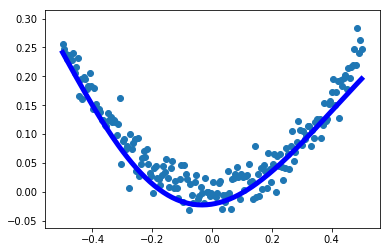

In [9]:
#定义损失函数
loss = tf.reduce_mean(tf.square(y - prediction))
tran_step =  tf.train.GradientDescentOptimizer(0.3).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2000):
        sess.run(tran_step, feed_dict = {x:x_data, y:y_data})
        if i%400 == 0:
            print(sess.run(loss, feed_dict={x:x_data, y:y_data}))
    #获得预测值
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'b',lw=5)
    plt.show()